In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df0 = pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
df = df0.resample('H').sum()
df['dia_semana'] = df.index.dayofweek

df

,Ativa,dia_semana
Data,,
2018-04-22 00:00:00,642.96,6
2018-04-22 01:00:00,643.68,6
2018-04-22 02:00:00,637.20,6
2018-04-22 03:00:00,632.88,6
2018-04-22 04:00:00,629.28,6
...,...,...
2020-02-15 19:00:00,727.92,5
2020-02-15 20:00:00,720.72,5
2020-02-15 21:00:00,710.64,5


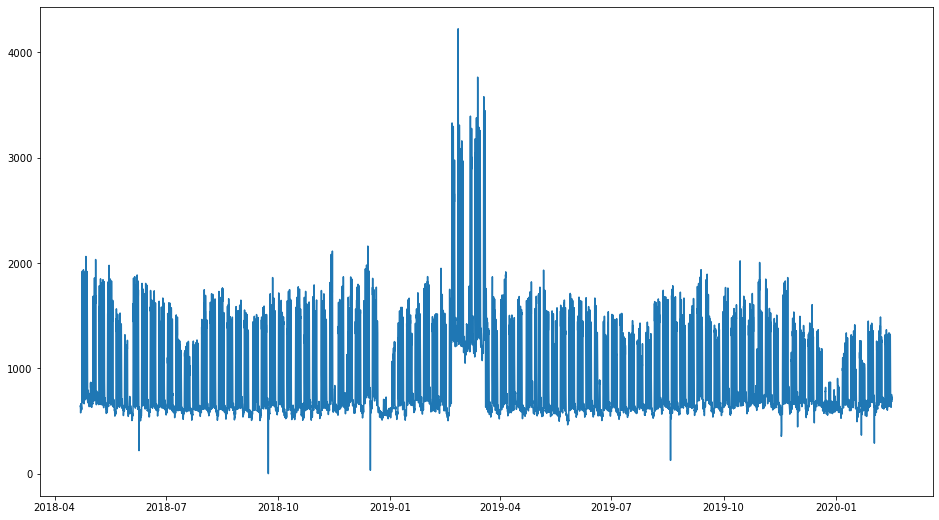

In [2]:
plt.figure(figsize=(16,9))
plt.plot(df['Ativa'])

In [17]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# transformar a coluna 'Ativa' em um array numpy
data = df['Ativa'].truncate('2019-04-06','2019-09-28')
# fit model
model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(1, 0, 1, 168))
model_fit = model.fit(disp=False)

MemoryError: Unable to allocate 916. MiB for an array with shape (4202, 169, 169) and data type float64

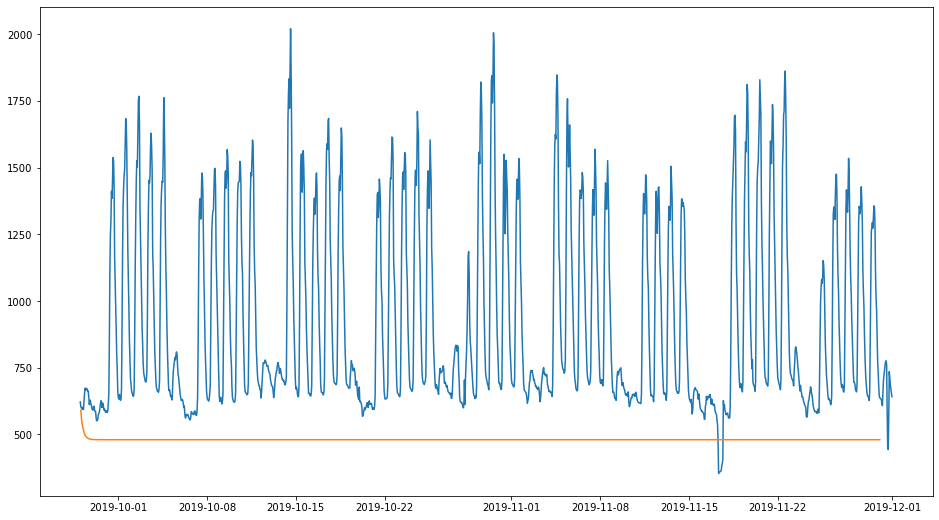

In [16]:
yhat = model_fit.predict(len(data), len(data)+(9*168))
plt.figure(figsize=(16,9))
plt.plot(df['Ativa'].truncate('2019-09-28','2019-12-01'))
plt.plot(yhat)